### 필수과제 1
- 캘리포니아 데이터를 가지고 다른 변수들까지 추가해 보시면서 실제 outlier에 대한 값을 비교해 보고
- 본인이 선택한 변수에서 outlier 파생변수를 추가한 내용과
- outlier 제거에 대한 내용 비교 분석하시면 됩니다.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 셋 불러오기

In [182]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

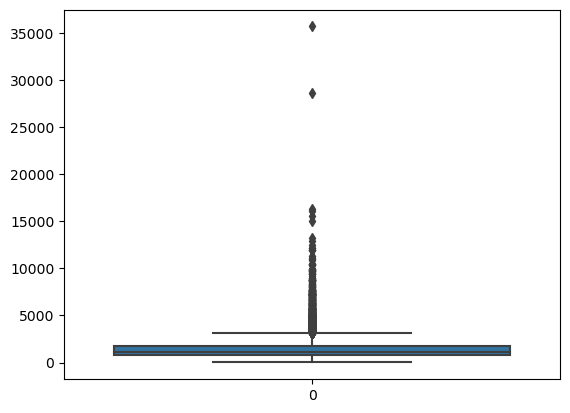

In [183]:
# AveBedrms 이상치 확인
sns.boxplot(df.Population)

In [188]:
df.Population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

In [199]:
#넘파이를 통해서 최대값에 인덱스를 추출한다.
np.argmax(df.Population)

15360

In [200]:
df.iloc[15360]

MedInc            2.572900
HouseAge         14.000000
AveRooms          5.270497
AveBedrms         1.010484
Population    35682.000000
AveOccup          7.482072
Latitude         33.350000
Longitude      -117.420000
target            1.344000
Name: 15360, dtype: float64

In [201]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

### 기본 베이스로 MSE 측정

In [202]:
df_sp = df[['AveRooms','HouseAge','Population','target']]

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
#train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp.drop('target',axis=1), df_sp['target'], test_size=0.3, random_state=111)

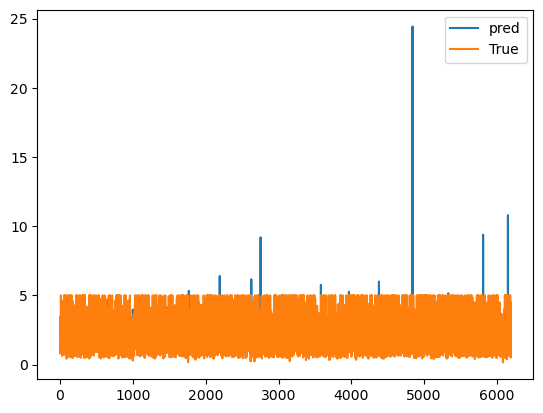

In [205]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [198]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

1.3737537935478012


### 이상치 제거 후 MSE 측정

In [206]:
Q1 = df_sp['Population'].quantile(0.25)
Q3 = df_sp['Population'].quantile(0.75)
IQR = Q3-Q1
rev_range = 3
filter1 = (df_sp['Population'] >= Q1 - rev_range*IQR) & (df_sp['Population'] <=Q3 + rev_range*IQR)

In [207]:
df_sp_rmv = df_sp.loc[filter1]

In [208]:
df_sp_rmv

,AveRooms,HouseAge,Population,target
0,6.984127,41.0,322.0,4.526
1,6.238137,21.0,2401.0,3.585
2,8.288136,52.0,496.0,3.521
3,5.817352,52.0,558.0,3.413
4,6.281853,52.0,565.0,3.422
...,...,...,...,...
20635,5.045455,25.0,845.0,0.781
20636,6.114035,18.0,356.0,0.771
20637,5.205543,17.0,1007.0,0.923
20638,5.329513,18.0,741.0,0.847


In [209]:
def replace_outlier(value):
    Q1 = df_sp['Population'].quantile(0.25)
    Q3 = df_sp['Population'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value <(Q1-rev_range*IQR))):
        value = np.nan
    if((value >(Q3+rev_range*IQR))):
        value = np.nan
    return value

df_sp['Population'] = df_sp['Population'].apply(replace_outlier).copy()

C:\Users\jh060\AppData\Local\Temp\ipykernel_12640\3851295763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Population'] = df_sp['Population'].apply(replace_outlier).copy()


In [211]:
df_sp.isna().sum()

AveRooms        0
HouseAge        0
Population    421
target          0
dtype: int64

In [212]:
#이상치 제거
df_sp2=df_sp.dropna()

In [213]:
df_sp2

,AveRooms,HouseAge,Population,target
0,6.984127,41.0,322.0,4.526
1,6.238137,21.0,2401.0,3.585
2,8.288136,52.0,496.0,3.521
3,5.817352,52.0,558.0,3.413
4,6.281853,52.0,565.0,3.422
...,...,...,...,...
20635,5.045455,25.0,845.0,0.781
20636,6.114035,18.0,356.0,0.771
20637,5.205543,17.0,1007.0,0.923
20638,5.329513,18.0,741.0,0.847


In [214]:
df_sp2.isna().sum()

AveRooms      0
HouseAge      0
Population    0
target        0
dtype: int64

In [215]:
df_sp2

,AveRooms,HouseAge,Population,target
0,6.984127,41.0,322.0,4.526
1,6.238137,21.0,2401.0,3.585
2,8.288136,52.0,496.0,3.521
3,5.817352,52.0,558.0,3.413
4,6.281853,52.0,565.0,3.422
...,...,...,...,...
20635,5.045455,25.0,845.0,0.781
20636,6.114035,18.0,356.0,0.771
20637,5.205543,17.0,1007.0,0.923
20638,5.329513,18.0,741.0,0.847


In [216]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('target',axis=1), df_sp2['target'], test_size=0.3, random_state=111)

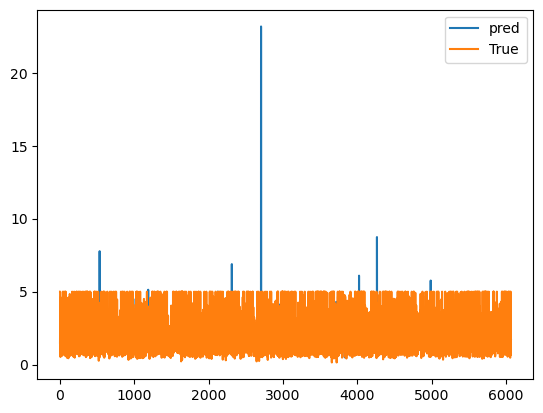

In [217]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

# 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [218]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse2)

1.3519367169770133


In [219]:
print(mse1)
print(mse2)

1.3737537935478012
1.3519367169770133


### 이상치에 가중을 두어 MSE 측정

In [220]:
df_sp3 = df[['MedInc','Population','Latitude','target']]

In [221]:
# 이상치에 가중치 부여 : 가중치를 둔 경우에는 1, 아닌 경우 0.
def saving_outlier(value):
    Q1 = df_sp2['Population'].quantile(0.25)
    Q3 = df_sp2['Population'].quantile(0.75)
    IQR = Q3-Q1
    rev_range = 3

    if((value < (Q1 - rev_range*IQR))):
        value = 1
    elif((value > (Q3 + rev_range*IQR))):
        value = 1
    else:
        value = 0
    return value

df_sp3['Population_sv'] = df_sp3['Population'].apply(saving_outlier)

C:\Users\jh060\AppData\Local\Temp\ipykernel_12640\1130489768.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp3['Population_sv'] = df_sp3['Population'].apply(saving_outlier)


In [222]:
df_sp3.Population_sv.sum()

472

In [223]:
df_sp3

,MedInc,Population,Latitude,target,Population_sv
0,8.3252,322.0,37.88,4.526,0
1,8.3014,2401.0,37.86,3.585,0
2,7.2574,496.0,37.85,3.521,0
3,5.6431,558.0,37.85,3.413,0
4,3.8462,565.0,37.85,3.422,0
...,...,...,...,...,...
20635,1.5603,845.0,39.48,0.781,0
20636,2.5568,356.0,39.49,0.771,0
20637,1.7000,1007.0,39.43,0.923,0
20638,1.8672,741.0,39.43,0.847,0


In [224]:
#이상치를 제거한 train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(df_sp3.drop('target',axis=1), df_sp3['target'], test_size=0.3, random_state=111)

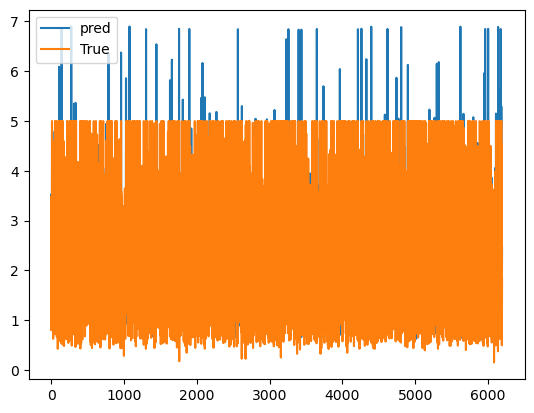

In [225]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

# 예측한 값
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [226]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

0.7210229838902216


In [266]:
mse4 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))

In [268]:
print(mse1,'기본 BASE')
print(mse2,'이상치 제거')
print(mse3,'이상치 가중')

1.3737537935478012 기본 BASE
1.3519367169770133 이상치 제거
0.7210229838902216 이상치 가중


- 이상치를 제거한 모델의 예측치가 가장 높음